In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("ggplot")

# Coupled tanks with salt solution

At t=0, tank $x$ contains 0 kg of salt and 6 L of water. At t=0, tank $y$ contains 20 kg of salt and 100 L of water.  

Flow of water:  
Outside --> $x$ : 6 L/min 0.2 kg/L  
$y$ --> $x$ : 1 L/min  
$y$ --> outside : 2 L/min  
$x$ --> outside : 4 L/min  
$x$ --> $y$ : 3 L/min


In [2]:
def two_tanks(n):
    # Salt concentration in kg/L
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)

    # Volume of water in tank
    vx = np.zeros(n + 1)
    vy = np.zeros(n + 1)

    # Mass of salt in tank
    mx = np.zeros(n + 1)
    my = np.zeros(n + 1)

    # Volume of water at t=0
    vx[0] = 100
    vy[0] = 100

    # Concentration of salt at t=0
    x[0] = 0
    y[0] = 20 / vy[0]

    # Outside to tank x 
    ov2xv = 6 # L
    o2x = 0.2 * ov2xv

    # Tank y to tank x L
    yv2xv = 1

    # Tank y to outside L
    yv2ov = 2

    # Tank x to outside L
    xv2ov = 4

    # Tank x to tank y L
    xv2yv = 3

    for step in range(n):
        x2y = xv2yv * x[step]
        y2x = yv2xv * y[step]

        x2o = xv2ov * x[step]
        y2o = yv2ov * y[step]

        vx[step + 1] = vx[step] + ov2xv + yv2xv - xv2ov - xv2yv
        vy[step + 1] = vy[step] + xv2yv - yv2xv - yv2ov

        x[step + 1] = (x[step] * vx[step] + y2x + o2x - x2y - x2o) / vx[step + 1]
        y[step + 1] = (y[step] * vy[step] + x2y - y2x - y2o) / vy[step + 1]

    return x, y, vx, vy



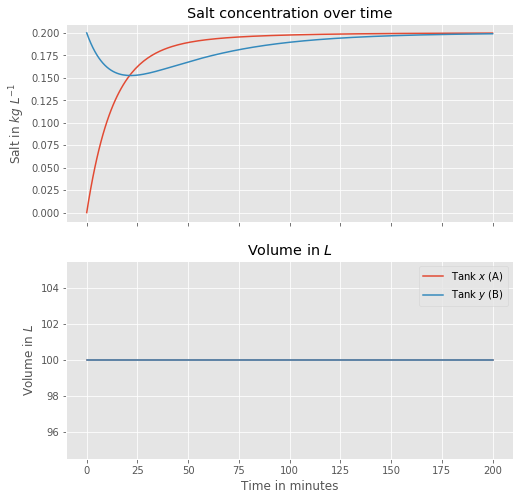

In [3]:
x, y, vx, vy = two_tanks(200)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 8)

ax1.plot(x, label="Tank $x$ (A)")
ax1.plot(y, label="Tank $y$ (B)")
ax1.set_ylabel("Salt in $kg\ L^{-1}$")
ax1.set_title("Salt concentration over time")

ax2.plot(vx, label="Tank $x$ (A)")
ax2.plot(vy, label="Tank $y$ (B)")
ax2.set_ylabel("Volume in $L$")
ax2.set_title("Volume in $L$")

ax2.set_xlabel("Time in minutes")
plt.legend()
plt.show()